## Project 1 - Text Analysis, Classification, and Predicition

**Developer:** Keith Faunce

**Course:** Artificial Intelligence Applications

**Program Requirements:**

  1. Import necessary packages
  2. Review data
  3. Prepare data for analysis
  4. Filter data
  5. Display product review sentiment analysis
  6. Create predicition analysis

### Necessary Installs

In [36]:
import pandas as pd
import nltk # Natural language Toolkit # Sentence tokenizer: divides text into list of sentences
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet # used to identify stop words - common words carrying little info
from nltk.sentiment import SentimentIntensityAnalyzer # use for sentiment analysis - positive/negative emotion of text
from sklearn.feature_extraction.text import CountVectorizer # countvectorizer() converts collections of docs into matrix
from sklearn.naive_bayes import MultinomialNB # classifies doc based on counts
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('vader_lexicon', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

True

<br>

## Load and review data

In [4]:
df = pd.read_csv('GuitarReviews2out.txt', sep='|', index_col='#')
print(df.shape)

(10, 3)


In [5]:
df.head(3)

,product,title,review
#,,,
1,BenderCaster,My new favorite guitar,"I’ve been playing the Wes Hall for many years,..."
2,BenderCaster,Good but not Great,"The Bender Caster sounds clean, the 3-position..."
3,BenderCaster,Try before buying,I tried the Caster in my local music store and...


In [6]:
df.iloc[0].review 

'I’ve been playing the Wes Hall for many years, but finally decided to buy this Bender Caster.  My Wes has terrific sustain, but the Caster gives me a funky sound I love!  The maple neck is terrific too.  Would highly recommend this guitar!'

In [9]:
# Combine all reviews into a list for data manipulation
allTextList = df.review.to_list()
#print(allTextList)

In [10]:
allText = ' '.join(allTextList) # Remove element quotes
#print(allText)

In [13]:
# Tokenizers divide strings into lists of substrings
tokens = nltk.word_tokenize(allText)
tokens[:10]

['I', '’', 've', 'been', 'playing', 'the', 'Wes', 'Hall', 'for', 'many']

In [15]:
wordFrequency = nltk.FreqDist(tokens)
wordFrequency
# Most items here aren't necessarily words, or even characters. Rather occurences: '.', ',', '''

FreqDist({'.': 34, 'the': 26, 'I': 19, ',': 17, '’': 12, 'but': 11, 'The': 11, 'to': 8, 'is': 8, 'and': 8, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

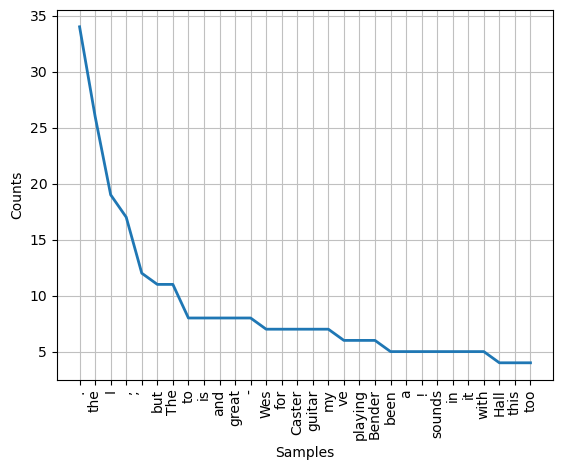

In [16]:
# Showcase the 30 most frequent occurences
wordFrequency.plot(30)

<br>

## Filter data

In [17]:
characters = [token for token in tokens if token.isalpha()]
characters[:10] 

['I', 've', 'been', 'playing', 'the', 'Wes', 'Hall', 'for', 'many', 'years']

In [18]:
lower_case_words = [word.lower() for word in characters]
lower_case_words[:10]

['i', 've', 'been', 'playing', 'the', 'wes', 'hall', 'for', 'many', 'years']

In [19]:
# stop words: little words carrying little information
stopWords = stopwords.words('english')
print(type(stopWords))
print(len(stopWords))

<class 'list'>
198


In [23]:
stopWords[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [24]:
# remove stop words
lower_case_no_stop_words = [word for word in lower_case_words if word not in stopWords]
lower_case_no_stop_words[:10]

['playing',
 'wes',
 'hall',
 'many',
 'years',
 'finally',
 'decided',
 'buy',
 'bender',
 'caster']

In [25]:
wordFrequency = nltk.FreqDist(lower_case_no_stop_words)
wordFrequency 

FreqDist({'guitar': 8, 'great': 8, 'wes': 7, 'caster': 7, 'playing': 6, 'bender': 6, 'sounds': 6, 'hall': 4, 'terrific': 4, 'years': 3, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

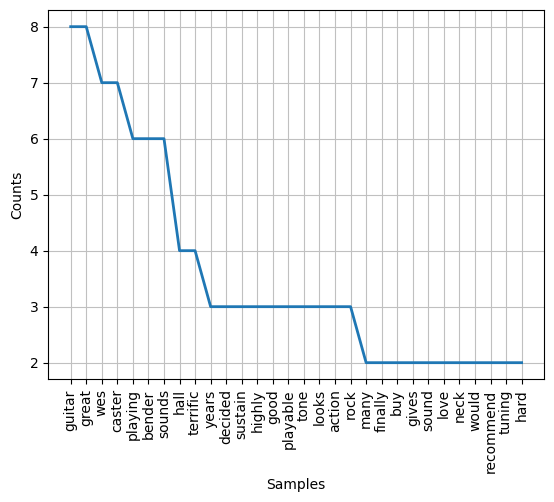

In [26]:
# Showcase 30 most frequent occurences from "normal" (no stop or non-character) words
wordFrequency.plot(30)

In [28]:
# Make similar words alike, cooked/cooking --> cook
#porterStemmer = nltk.PorterStemmer()
#stemmed_words = [porterStemmer.stem(word) for word in lower_case_no_stop_words]
#stemmed_words[:10]

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [37]:
lemmatized_words = [
    lemmatizer.lemmatize(word, get_wordnet_pos(word)) 
    for word in lower_case_no_stop_words
]
lemmatized_words[:10]

['play',
 'wes',
 'hall',
 'many',
 'year',
 'finally',
 'decide',
 'buy',
 'bender',
 'caster']

In [38]:
# Link words with tags
wordsWithTags = nltk.pos_tag(tokens)
wordsWithTags[:10]

[('I', 'PRP'),
 ('’', 'VBP'),
 ('ve', 'RB'),
 ('been', 'VBN'),
 ('playing', 'VBG'),
 ('the', 'DT'),
 ('Wes', 'NNP'),
 ('Hall', 'NNP'),
 ('for', 'IN'),
 ('many', 'JJ')]

In [39]:
nouns = [word for (word, tag) in wordsWithTags if tag.startswith('N')]
nouns[:8]

['Wes', 'Hall', 'years', 'Bender', 'Caster', 'My', 'Wes', 'sustain']

In [40]:
wordFrequency = nltk.FreqDist(nouns)
wordFrequency

FreqDist({'Wes': 7, 'Caster': 7, 'guitar': 7, 'Bender': 6, 'Hall': 4, 'years': 3, 'sustain': 3, 'tone': 3, 'action': 3, 'rock': 3, ...})

<Axes: xlabel='Samples', ylabel='Counts'>

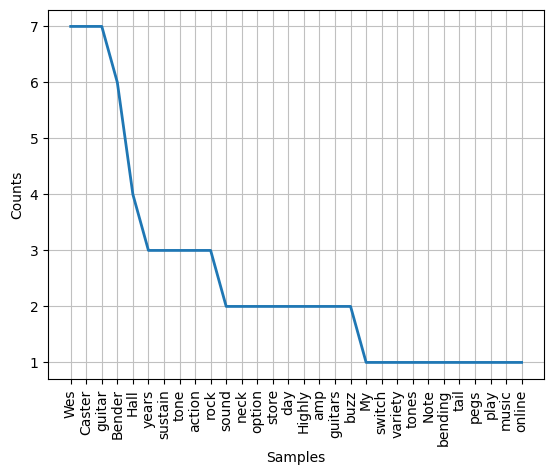

In [41]:
# plot
wordFrequency.plot(30)

### Part 5: Sentiment analysis

In [42]:
analyzer = SentimentIntensityAnalyzer()

In [43]:
review1 = df.iloc[0].review
review1

'I’ve been playing the Wes Hall for many years, but finally decided to buy this Bender Caster.  My Wes has terrific sustain, but the Caster gives me a funky sound I love!  The maple neck is terrific too.  Would highly recommend this guitar!'

In [44]:
# Calculate polarity scores for first review
analyzer.polarity_scores(review1)

{'neg': 0.028, 'neu': 0.621, 'pos': 0.351, 'compound': 0.9646}

In [45]:
compoundList = []
for index, row in df.iterrows():
    text = row.review
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    print(format(index, '2d'), format(compound, '6.2f'), row.title)
    compoundList.append(compound)

 1   0.96 My new favorite guitar
 2   0.81 Good but not Great
 3   0.49 Try before buying
 4   0.95 Love It!
 5   0.91 Great Guitar, Great Price
 6   0.98 Amazing Guitar
 7   0.92 None better
 8   0.97 Great Choice
 9  -0.82 Good Guitar but Pricey
10   0.53 It’s it


In [46]:
def compoundScore(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# apply analyzer on all reviews in DF
df['compound'] = df['review'].apply(compoundScore)
df

,product,title,review,compound
#,,,,
1,BenderCaster,My new favorite guitar,"I’ve been playing the Wes Hall for many years,...",0.9646
2,BenderCaster,Good but not Great,"The Bender Caster sounds clean, the 3-position...",0.8074
3,BenderCaster,Try before buying,I tried the Caster in my local music store and...,0.4854
4,BenderCaster,Love It!,Everything about the Bender Caster met or exce...,0.9533
5,BenderCaster,"Great Guitar, Great Price","I’ve been playing Bender guitars for years, th...",0.9136
6,WesHall,Amazing Guitar,I’ve been playing an entry level guitar for ye...,0.9751
7,WesHall,None better,The Wes Hall is THE GUITAR for rock & roll. I...,0.9184
8,WesHall,Great Choice,I’ve been playing guitar occasionally but now ...,0.9738
9,WesHall,Good Guitar but Pricey,I was excited to order the Wes but given the p...,-0.8225


<br>

## Text Classification

In [47]:
df_email = pd.read_csv('emails2.txt', usecols=['isSpam', 'Message'], sep='|')
df_email.shape

(279, 2)

In [49]:
df_email.head(3) 

,isSpam,Message
0,0,just to update you on this project ' s status ...
1,0,the above referenced meters need to be placed ...
2,0,( see attached file : hpll 228 . xls ) - hpll ...


In [51]:
df_email.isSpam.value_counts()

isSpam
0    140
1    139
Name: count, dtype: int64

In [53]:
def remove_non_letters(text):
    alist = [c if c.isalpha() else ' ' for c in text]
    return ''.join(alist)

df_email['NonLettersRemoved'] = df_email['Message'].apply(remove_non_letters)

In [56]:
df_email.iloc[0].NonLettersRemoved[:160]

'just to update you on this project   s status   based on a new report that scott mills ran for me from sitara   i have come up with the following counterparties'

In [57]:
tokenizer = lambda text: word_tokenize(text)
df_email['NonLettersRemoved'] = df_email['NonLettersRemoved'].apply(tokenizer)

In [59]:
df_email['NonLettersRemoved'][:10]

0    [just, to, update, you, on, this, project, s, ...
1    [the, above, referenced, meters, need, to, be,...
2          [see, attached, file, hpll, xls, hpll, xls]
Name: NonLettersRemoved, dtype: object

In [60]:
lemmatize_words = lambda words: [
    lemmatizer.lemmatize(word, get_wordnet_pos(word))
    for word in words
]

df_email['NonLettersRemoved'] = df_email['NonLettersRemoved'].apply(lemmatize_words)

In [37]:
# removing morphological affixes from words
# exs: playing = play
#stemmer = lambda words: [ porterStemmer.stem(word) for word in words ]
#df['NonLettersRemoved'] = df['NonLettersRemoved'].apply(stemmer)

In [62]:
df_email['NonLettersRemoved'][:10]

0    [just, to, update, you, on, this, project, s, ...
1    [the, above, reference, meter, need, to, be, p...
2              [see, attach, file, hpll, xl, hpll, xl]
3    [daren, it, s, in, bob, forward, by, robert, c...
4    [daren, fyi, bob, forward, by, robert, cotten,...
5    [help, steve, mauch, at, hesco, be, want, an, ...
6    [teco, tap, hpl, iferc, enron, l, hpl, lsk, ic...
7    [daren, the, valve, for, meter, be, not, shut,...
8    [i, will, need, to, make, these, change, in, s...
9    [daren, do, you, know, if, there, should, be, ...
Name: NonLettersRemoved, dtype: object

In [63]:
rejoiner = lambda words: ' '.join(words)
df_email['NonLettersRemoved'] = df_email['NonLettersRemoved'].apply(rejoiner)

In [64]:
df_email.head(3)

,isSpam,Message,NonLettersRemoved
0,0,just to update you on this project ' s status ...,just to update you on this project s status ba...
1,0,the above referenced meters need to be placed ...,the above reference meter need to be place on ...
2,0,( see attached file : hpll 228 . xls ) - hpll ...,see attach file hpll xl hpll xl


<br>

## Predictive Analysis

In [65]:
X = df_email['NonLettersRemoved']
y = df_email['isSpam']

In [66]:
# dependent: isSpam
# independent: NonLettersRemoved
# train_text, test_text, train_labels, test_labels
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.25, random_state=1)

In [44]:
# CountVectorizer(): Converts collecion of text documents into matrix of token counts
# rows represent docs, cols represent tokens
# counts occurences of each token

# use CountVectorizer() to determine word freq for email
bow_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1)) 

**fit() vs. transform() vs. fit_transform() methods:**
  - fit(): calculates mean and variance of each of the features
  - transform(): transforms all features using respective mean and variance
  - fit_transform(): used on training data to scale training data, also learn scaling parameters of data

In [45]:
# fit_transform(): used on training data
bow_train_features = bow_vectorizer.fit_transform(train_text)

In [46]:
bow_test_features = bow_vectorizer.transform(test_text)

In [47]:
model = MultinomialNB()

In [48]:
# fit() trains machine learning model on dataset
# fit() method: takes in dataset then fits model to data
# MultinomialDB fit() method: expects x and y input

# fit() method: determines probabilities of individual words occuring
model.fit(bow_train_features, train_labels)

MultinomialNB()

In [49]:
# predict nonspam vs spam emails
predictions = model.predict(bow_test_features)

In [50]:
# num of emails in test data
len(test_labels)

70

In [51]:
# num of emails in training data
len(train_labels)

209

In [52]:
# evaluating model's predictions:
test_results = \
   pd.DataFrame({'actual':test_labels.tolist(), 'predict':list(predictions)})
test_results

,actual,predict
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
65,0,0
66,0,0
67,0,0
68,0,0


In [53]:
# display all rows where model was incorrect
test_results[test_results.actual != test_results.predict]

,actual,predict
0,0,1
24,0,1
36,1,0
53,0,1


In [54]:
# calculate accuracy score for set of predicted labels against true labels
accuracy_score(test_results.actual, test_results.predict)

# display as percentage (note: 94% accuracy)
print('Accuracy {:.1%}'.format(accuracy_score(test_results.actual, test_results.predict)))

Accuracy 94.3%


In [55]:
# also can check accuracy for confusion matrix
# creates table to asses where errors occured
# rows represent classes outcomes should have been
# cols represent predictions made

confusion_matrix = metrics.confusion_matrix(test_results.actual, test_results.predict)

confusion_matrix

array([[33,  3],
       [ 1, 33]], dtype=int64)

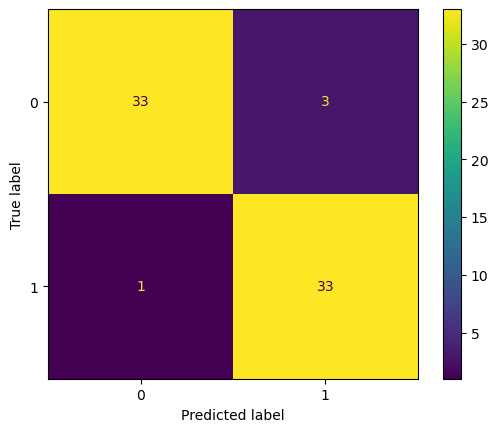

In [56]:
# four quad square
# TL Q: Prediction no, true value no
# TR Q: Prediction yes, true value no
# BL Q: Prediction no, true value yes
# BR Q: Prediction yes, true value yes

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [57]:
# interpretation:
# row1: Model correctly categorized **nonspam** e-mails in 33 of 36 cases (91.7%), "specificity"
# row2: Model correctly categorized **spam** e-mails in 33 out of 34 cases (97.1%), "sensitivity"

|            | Predicted: No (not spam) | Predicted: Yes (spam) | Total: |
| ---------- | ------------------------ | --------------------- | ------ |
| Actual: Yes (spam) | FN = 1 | TP = 33 | 34 |
| Total: | 34 | 36 |  |

### Related Metrics:

|       Metric       |       Formula      |      Definition      |
| ------------------ | ------------------ | -------------------- |
| Accuracy | (TP+TN)/(TP+TN+FP+FN) | Percentage of total items classified correctly |
| Precision | TP/(TP+FP) | Positive predicitions accuracy |
| Recall/Sensitivity | TP/(TP+FN) | True positive rate |
| Specificity | TN/(TN+FP) | True negative rate |
| F1 score | 2TP/(2TP+FP+FN) | Weighted average of precision and recall/sense | 

#### Examples:

In [58]:
# Accuracy measures how often model is correct
# Calculation: (True positive + True negative)

Accuracy = metrics.accuracy_score(test_results.actual, test_results.predict)

In [59]:
# Precision: Of positives predicted, what percent is truly positive
# Calculation: True positive / (true positive + false positive)

Precision = metrics.precision_score(test_results.actual, test_results.predict)

In [60]:
# Sensitivity
# Calculation: True positive / (true positive + false negative)

Sensitivity_recall = metrics.recall_score(test_results.actual, test_results.predict)

In [61]:
# Specificity
# How well model predicts negative results
# Calculation: True negative / (true negative + false positive)
Specificity = metrics.recall_score(test_results.actual, test_results.predict, pos_label=0)

In [62]:
# F-score: "harmonic mean" of precision and sense
# considers both false pos and false neg cases
# Calculation: 2 * ((precision * sensitivity) / (precision + sense)

F1_score = metrics.f1_score(test_results.actual, test_results.predict)

In [63]:
# all calculations print dictionary
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9428571428571428, 'Precision': 0.9166666666666666, 'Sensitivity_recall': 0.9705882352941176, 'Specificity': 0.9166666666666666, 'F1_score': 0.9428571428571428}


In [64]:
# my_dict = key:value pairs
my_dictionary = {"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score}

print("\n".join("{0: <16}\t{1:.2f}".format(k, v) for k, v in my_dictionary.items()))

Accuracy        	0.94
Precision       	0.92
Sensitivity_recall	0.97
Specificity     	0.92
F1_score        	0.94
